### Setup

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

from altair import Chart, Color, Scale

from IPython.display import display

from matplotlib import rcParams

sns.set(style='ticks', palette='Set2')

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
pd.set_option('display.max_columns', 9999)

### Dataset

In [5]:
df=pd.read_csv('data cancer.csv')
df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
312  89382602         B       12.760         13.37           82.29      504.1   
470   9113778         B        9.667         18.49           61.49      289.1   
499     91485         M       20.590         21.24          137.80     1320.0   
436    908916         B       12.870         19.54           82.67      509.2   
68     859471         B        9.029         17.33           58.79      250.5   
264    889719         M       17.190         22.07          111.60      928.3   
100    862717         M       13.610         24.98           88.05      582.7   
404    904969         B       12.340         14.95           78.29      469.1   
112     86409         B       14.260         19.65           97.83      629.9   
446   9110732         M       17.750         28.03          117.30      981.6   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
312          0.08794           0.07948         0.04052              0.02548   
470          0.08946           0.06258         0.02948              0.01514   
499          0.10850           0.16440         0.21880              0.11210   
436          0.09136           0.07883         0.01797              0.02090   
68           0.10660           0.14130         0.31300              0.04375   
264          0.09726           0.08995         0.09061              0.06527   
100          0.09488           0.08511         0.08625              0.04489   
404          0.08682           0.04571         0.02109              0.02054   
112          0.07837           0.22330         0.30030              0.07798   
446          0.09997           0.13140         0.16980              0.08293   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
312         0.1601                 0.06140     0.3265      0.6594   
470         0.2238                 0.06413     0.3776      1.3500   
499         0.1848                 0.06222     0.5904      1.2160   
436         0.1861                 0.06347     0.3665      0.7693   
68          0.2111                 0.08046     0.3274      1.1940   
264         0.1867                 0.05580     0.4203      0.7383   
100         0.1609                 0.05871     0.4565      1.2900   
404         0.1571                 0.05708     0.3833      0.9078   
112         0.1704                 0.07769     0.3628      1.4900   
446         0.1713                 0.05916     0.3897      1.0770   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
312         2.346    25.18       0.006494        0.027680      0.031370   
470         2.569    22.73       0.007501        0.019890      0.027140   
499         4.206    75.09       0.006666        0.027910      0.040620   
436         2.597    26.50       0.005910        0.013620      0.007066   
68          1.885    17.67       0.009549        0.086060      0.303800   
264         2.819    45.42       0.004493        0.012060      0.020480   
100         2.861    43.14       0.005872        0.014880      0.026470   
404         2.602    30.15       0.007702        0.008491      0.013070   
112         3.399    29.25       0.005298        0.074460      0.143500   
446         2.873    43.95       0.004714        0.020150      0.036970   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
312           0.010690      0.01731              0.004392         14.19   
470           0.009883      0.01960              0.003913         11.14   
499           0.014790      0.01117              0.003727         23.86   
436           0.006502      0.02223              0.002378         14.45   
68            0.033220      0.04197              0.009559         10.31   
264           0.009875      0.01144              0.001575         21.58   
100           0.009921      0.01465              0.002355         16.99   
404           0.010300      0.02970              0.001432      

In [6]:
# checking missing values
df.isnull().values.any()

True

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

#### Description


Attribute information <p>
* ID number
* Diagnosis [(M = malignant, B = benign)](http://www.nationalbreastcancer.org/breast-tumors)

* Ten real-valued features are computed for each cell nucleus:
        a) radius (mean of distances from center to points on the perimeter)
        b) texture (standard deviation of gray-scale values)
        c) perimeter
        d) area
        e) smoothness (local variation in radius lengths)
        f) compactness (perimeter^2 / area - 1.0)
        g) concavity (severity of concave portions of the contour)
        h) concave points (number of concave portions of the contour)
        i) symmetry 
        j) fractal dimension ("coastline approximation" - 1)

In [8]:
# map integer value
diagnosis_map = { 'B' : 0,
                  'M' : 1}

df['diagnosis_new']=(df['diagnosis']).map(diagnosis_map)

#drop unnamed column, id
df=df.drop(['Unnamed: 32', 'id'], axis=1)

df.sample(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
320         B        10.25         16.18           66.52      324.2   
136         B        11.71         16.67           74.72      423.6   
293         B        11.85         17.46           75.54      432.7   
43          M        13.28         20.28           87.32      545.2   
449         M        21.10         20.52          138.10     1384.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
320          0.10610           0.11110         0.06726              0.03965   
136          0.10510           0.06095         0.03592              0.02600   
293          0.08372           0.05642         0.02688              0.02280   
43           0.10410           0.14360         0.09847              0.06158   
449          0.09684           0.11750         0.15720              0.11550   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
320         0.1743                 0.07279     0.3677      1.4710   
136         0.1339                 0.05945     0.4489      2.5080   
293         0.1875                 0.05715     0.2070      1.2380   
43          0.1974                 0.06782     0.3704      0.8249   
449         0.1554                 0.05661     0.6643      1.3610   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
320         1.597    22.68       0.010490         0.04265       0.04004   
136         3.258    34.37       0.006578         0.01380       0.02662   
293         1.234    13.88       0.007595         0.01500       0.01412   
43          2.427    31.33       0.005072         0.02147       0.02185   
449         4.542    81.89       0.005467         0.02075       0.03185   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
320           0.015440      0.02719              0.007596         11.28   
136           0.013070      0.01359              0.003707         13.33   
293           0.008578      0.01792              0.001784         13.06   
43            0.009560      0.01719              0.003317         17.38   
449           0.014660      0.01029              0.002205         25.68   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
320          20.61            71.53       390.4            0.1402   
136          25.48            86.16       546.7            0.1271   
293          25.75            84.35       517.8            0.1369   
43           28.00           113.10       907.2            0.1530   
449          32.07           168.20      2022.0            0.1368   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
320             0.2360           0.1898               0.09744          0.2608   
136             0.1028           0.1046               0.06968          0.1712   
293             0.1758           0.1316               0.09140          0.3101   
43              0.3724           0.3664               0.14920          0.3739   
449             0.3101           0.4399               0.22800          0.2268   

     fractal_dimension_worst  diagnosis_new  
320                  0.09702              0  
136                  0.07343              0  
293                  0.07007              0  
43                   0.10270              1  
449                  0.07425              1

#### Describe & summarize the data

* Looking for unusually high or low values (outliers)
* Statistical tests
* deciding the best way to categorize the data

In [9]:
df.corr()[['diagnosis_new']].sort_values(by='diagnosis_new', ascending=False) 

diagnosis_new
diagnosis_new                 1.000000
concave points_worst          0.793566
perimeter_worst               0.782914
concave points_mean           0.776614
radius_worst                  0.776454
perimeter_mean                0.742636
area_worst                    0.733825
radius_mean                   0.730029
area_mean                     0.708984
concavity_mean                0.696360
concavity_worst               0.659610
compactness_mean              0.596534
compactness_worst             0.590998
radius_se                     0.567134
perimeter_se                  0.556141
area_se                       0.548236
texture_worst                 0.456903
smoothness_worst              0.421465
symmetry_worst                0.416294
texture_mean                  0.415185
concave points_se             0.408042
smoothness_mean               0.358560
symmetry_mean                 0.330499
fractal_dimension_worst       0.323872
compactness_se                0.292999
concavity_se                  0.253730
fractal_dimension_se          0.077972
symmetry_se                  -0.006522
texture_se                   -0.008303
fractal_dimension_mean       -0.012838
smoothness_se                -0.067016

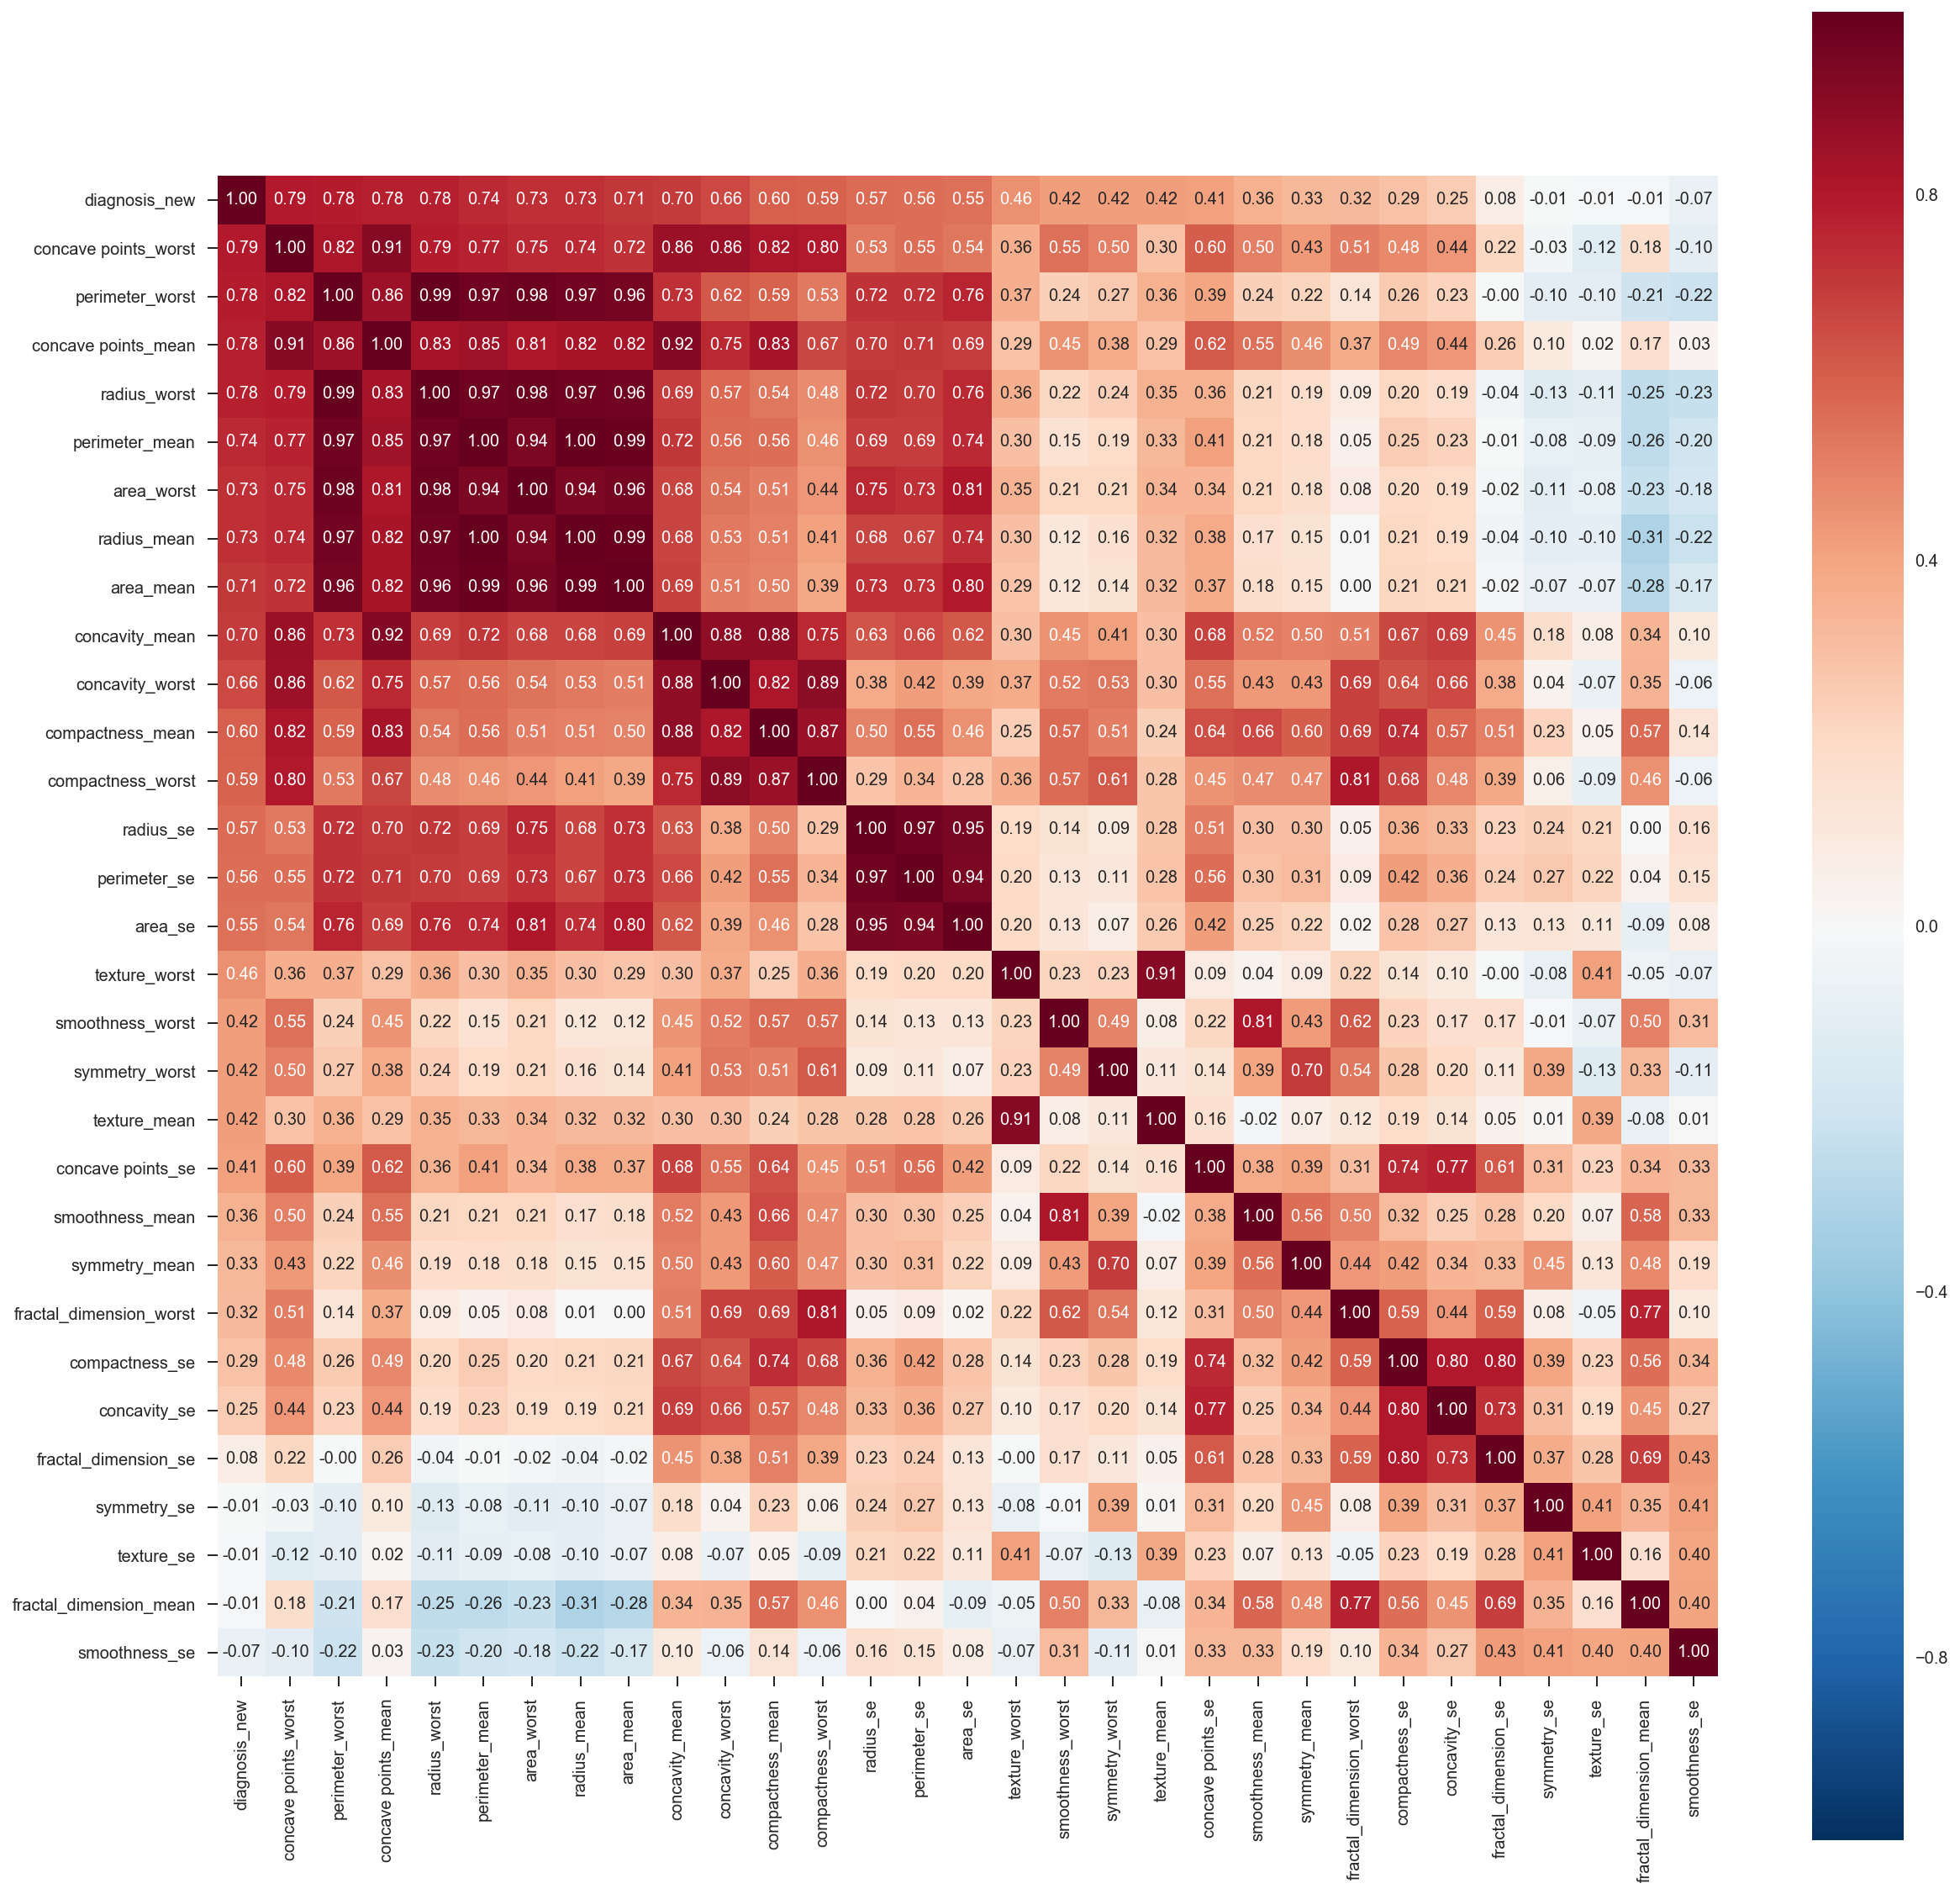

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20)) 

n=len(df.columns) 
corrmat = df.corr()
cols = corrmat.nlargest(n, 'diagnosis_new')['diagnosis_new'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
# drop "_se", "_worst"
dfc=df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
             'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
             'fractal_dimension_se', 'radius_worst', 'texture_worst',
             'perimeter_worst', 'area_worst', 'smoothness_worst',
             'compactness_worst', 'concavity_worst', 'concave points_worst',
             'symmetry_worst', 'fractal_dimension_worst'], axis=1)

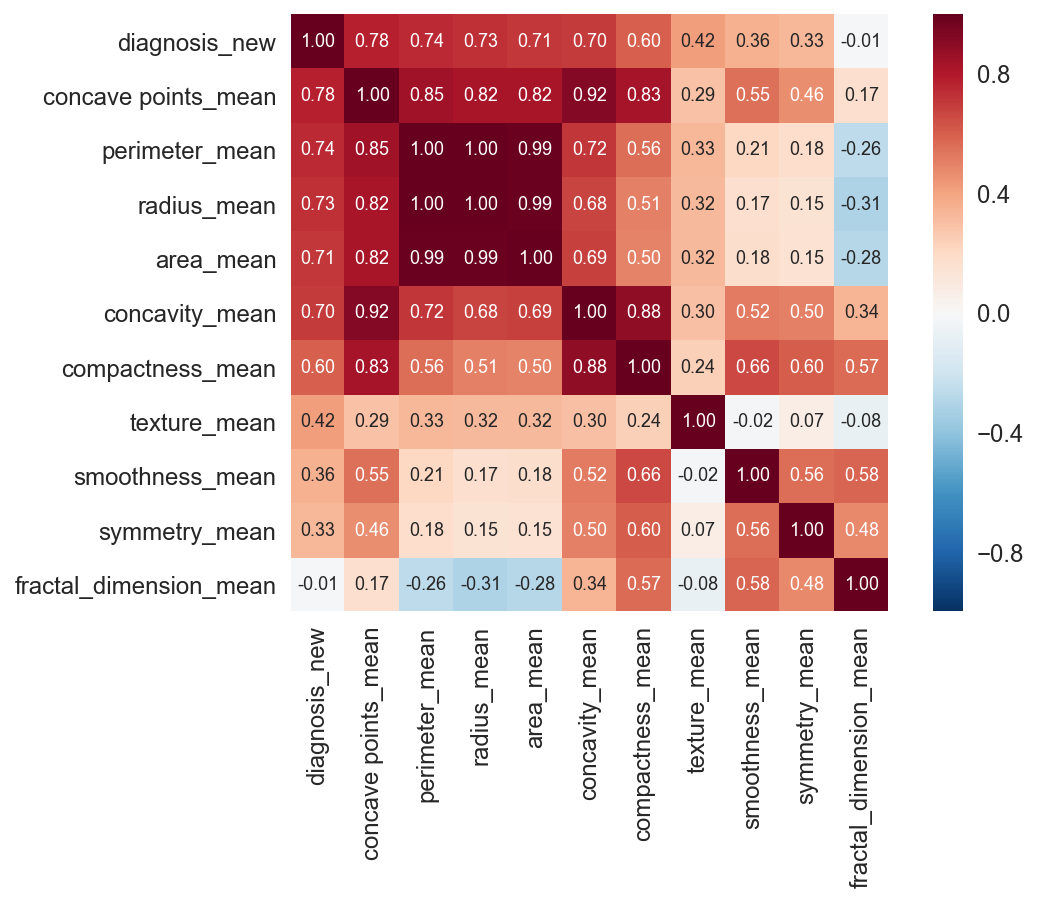

In [12]:
n=len(dfc.columns) 
corrmat = dfc.corr()
cols = corrmat.nlargest(n, 'diagnosis_new')['diagnosis_new'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
# correlation coefficient >=0.50
data=dfc[['diagnosis_new','radius_mean','perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]

In [14]:
# Malignant
data[data.diagnosis_new==1].describe()

diagnosis_new  radius_mean  perimeter_mean    area_mean  \
count          212.0   212.000000      212.000000   212.000000   
mean             1.0    17.462830      115.365377   978.376415   
std              0.0     3.203971       21.854653   367.937978   
min              1.0    10.950000       71.900000   361.600000   
25%              1.0    15.075000       98.745000   705.300000   
50%              1.0    17.325000      114.200000   932.000000   
75%              1.0    19.590000      129.925000  1203.750000   
max              1.0    28.110000      188.500000  2501.000000   

       compactness_mean  concavity_mean  concave points_mean  
count        212.000000      212.000000           212.000000  
mean           0.145188        0.160775             0.087990  
std            0.053987        0.075019             0.034374  
min            0.046050        0.023980             0.020310  
25%            0.109600        0.109525             0.064620  
50%            0.132350        0.151350             0.086280  
75%            0.172400        0.203050             0.103175  
max            0.345400        0.426800             0.201200

In [15]:
#Benign
data[data.diagnosis_new==0].describe()

diagnosis_new  radius_mean  perimeter_mean   area_mean  \
count          357.0   357.000000      357.000000  357.000000   
mean             0.0    12.146524       78.075406  462.790196   
std              0.0     1.780512       11.807438  134.287118   
min              0.0     6.981000       43.790000  143.500000   
25%              0.0    11.080000       70.870000  378.200000   
50%              0.0    12.200000       78.180000  458.400000   
75%              0.0    13.370000       86.100000  551.100000   
max              0.0    17.850000      114.600000  992.100000   

       compactness_mean  concavity_mean  concave points_mean  
count        357.000000      357.000000           357.000000  
mean           0.080085        0.046058             0.025717  
std            0.033750        0.043442             0.015909  
min            0.019380        0.000000             0.000000  
25%            0.055620        0.020310             0.015020  
50%            0.075290        0.037090             0.023440  
75%            0.097550        0.059990             0.032510  
max            0.223900        0.410800             0.085340

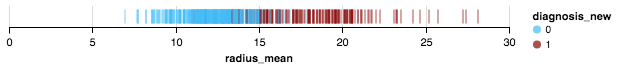

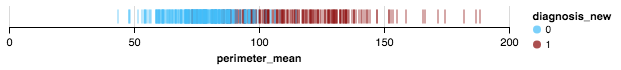

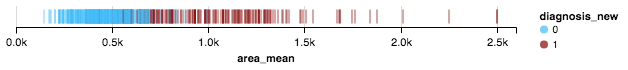

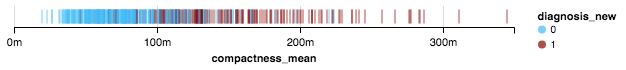

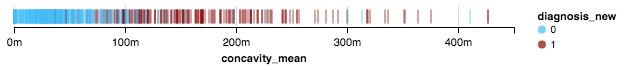

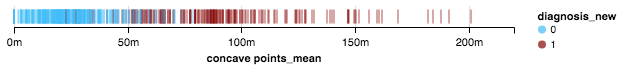

In [16]:
for col in data.columns:
    if col == 'diagnosis_new': continue
    display(Chart(df).mark_tick().encode(
        x=col, 
        color=Color('diagnosis_new:N', scale=Scale(range=['#44BDF9', '#870505']))
    ))

In [17]:
X = df.drop(['diagnosis_new', 'diagnosis'], axis=1).values
y = df['diagnosis_new'].values

### Processing

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

classifiers = [
    LogisticRegression(),
    SVC(), 
    KNeighborsClassifier(n_neighbors=3), 
    RandomForestClassifier(n_estimators=30, random_state=1),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearSVC(),
    XGBClassifier(learning_rate=0.1, max_depth=7, min_child_weight=4, subsample=0.6)
]

scalers = [
    RobustScaler(), 
    StandardScaler()
]

pipelines = []
for clf in classifiers:
    clf_name = type(clf).__name__
    
    pipelines.append(Pipeline([(clf_name, clf)]))
    
    for scaler in scalers:
        scaler_name = type(scaler).__name__        
        pipelines.append(Pipeline([(scaler_name, scaler), (clf_name, clf)]))
        

In [19]:
X = df.drop(['diagnosis_new', 'diagnosis'], axis=1).values
y = df['diagnosis_new'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

results = {}
for pipeline in pipelines:        
    pipeline.fit(X_train, y_train)
    pipeline_name = '-'.join([ s[0] for s in pipeline.steps ])
    results[pipeline_name] = pipeline.score(X_test, y_test)
    
df_results = pd.DataFrame(results, index=['score']).T
df_results.sort_values(by='score', ascending=False)

score
RobustScaler-LogisticRegression            0.988304
XGBClassifier                              0.982456
StandardScaler-XGBClassifier               0.982456
StandardScaler-LogisticRegression          0.982456
RobustScaler-XGBClassifier                 0.982456
RobustScaler-LinearSVC                     0.982456
RobustScaler-RandomForestClassifier        0.976608
StandardScaler-SVC                         0.976608
StandardScaler-RandomForestClassifier      0.976608
StandardScaler-LinearSVC                   0.976608
StandardScaler-AdaBoostClassifier          0.976608
AdaBoostClassifier                         0.976608
RobustScaler-AdaBoostClassifier            0.976608
RandomForestClassifier                     0.976608
RobustScaler-SVC                           0.976608
RobustScaler-KNeighborsClassifier          0.964912
LogisticRegression                         0.964912
GradientBoostingClassifier                 0.959064
RobustScaler-GradientBoostingClassifier    0.959064
StandardScaler-GradientBoostingClassifier  0.959064
StandardScaler-KNeighborsClassifier        0.959064
KNeighborsClassifier                       0.941520
LinearSVC                                  0.935673
SVC                                        0.631579

In [20]:
from tpot import TPOTClassifier

X = df.drop(['diagnosis_new', 'diagnosis'], axis=1).values
y = df['diagnosis_new'].values
X = RobustScaler().fit_transform(X)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
tpot.score(X_test, y_test)

Optimization Progress:  33%|███▎      | 40/120 [00:17<00:43,  1.83pipeline/s]

Generation 1 - Current best internal CV score: 0.9671794871794871


Optimization Progress:  50%|█████     | 60/120 [00:28<00:14,  4.01pipeline/s]

Generation 2 - Current best internal CV score: 0.9672435897435896


Optimization Progress:  67%|██████▋   | 80/120 [00:46<00:32,  1.25pipeline/s]

Generation 3 - Current best internal CV score: 0.9673076923076923


Optimization Progress:  83%|████████▎ | 100/120 [00:55<00:15,  1.32pipeline/s]

Generation 4 - Current best internal CV score: 0.9697435897435897


Generation 5 - Current best internal CV score: 0.9697435897435897

Best pipeline: GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=8, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=3, GradientBoostingClassifier__min_samples_split=16, GradientBoostingClassifier__subsample=0.35)


0.96491228070175439

LogisticRegression 0.937062937063


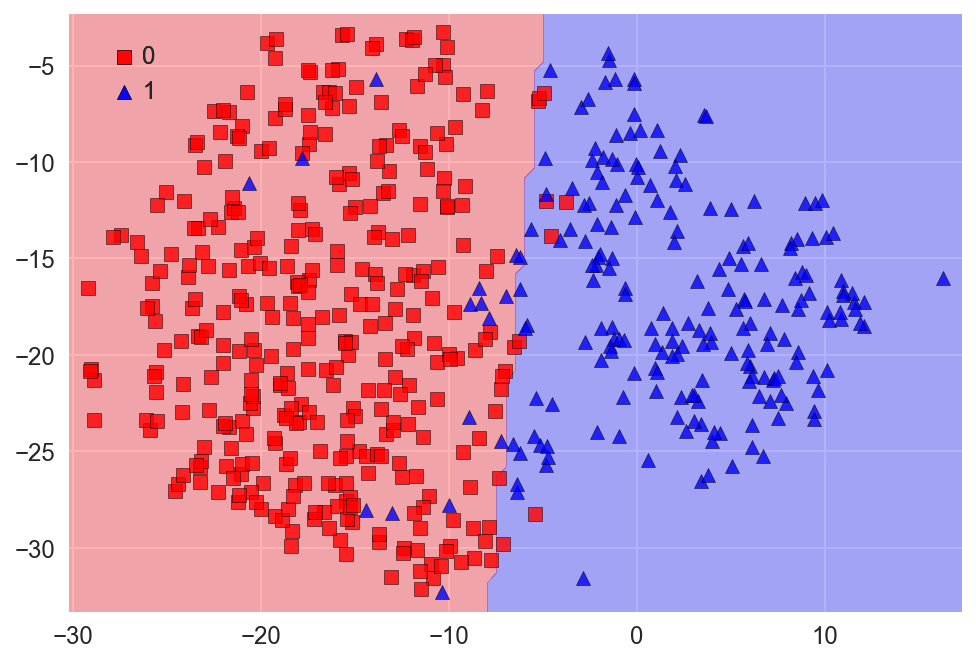

SVC 0.944055944056


KNeighborsClassifier 0.951048951049


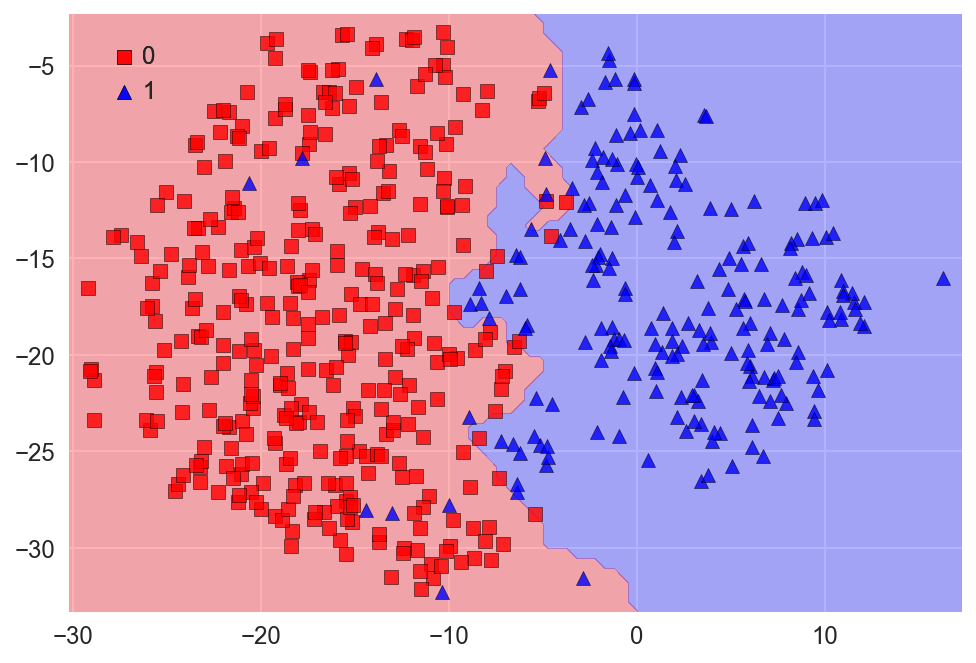

RandomForestClassifier 0.958041958042


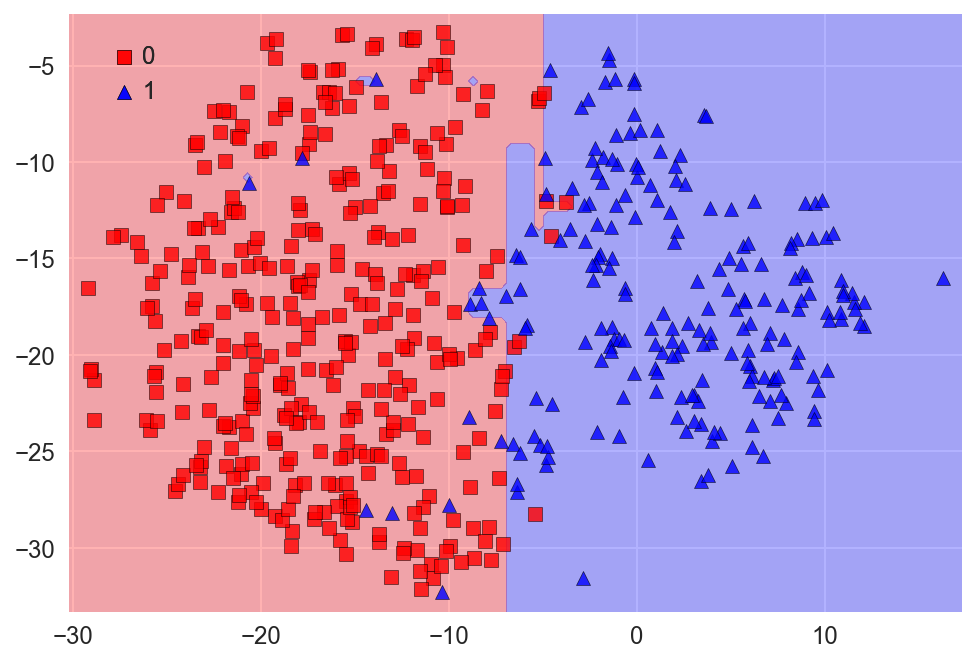

AdaBoostClassifier 0.944055944056


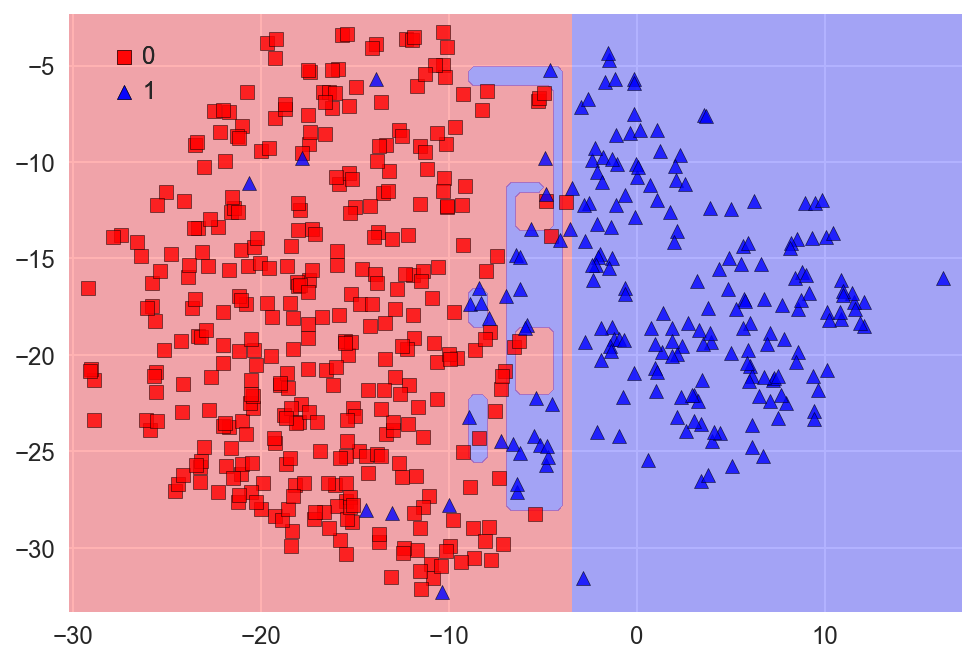

GradientBoostingClassifier 0.951048951049


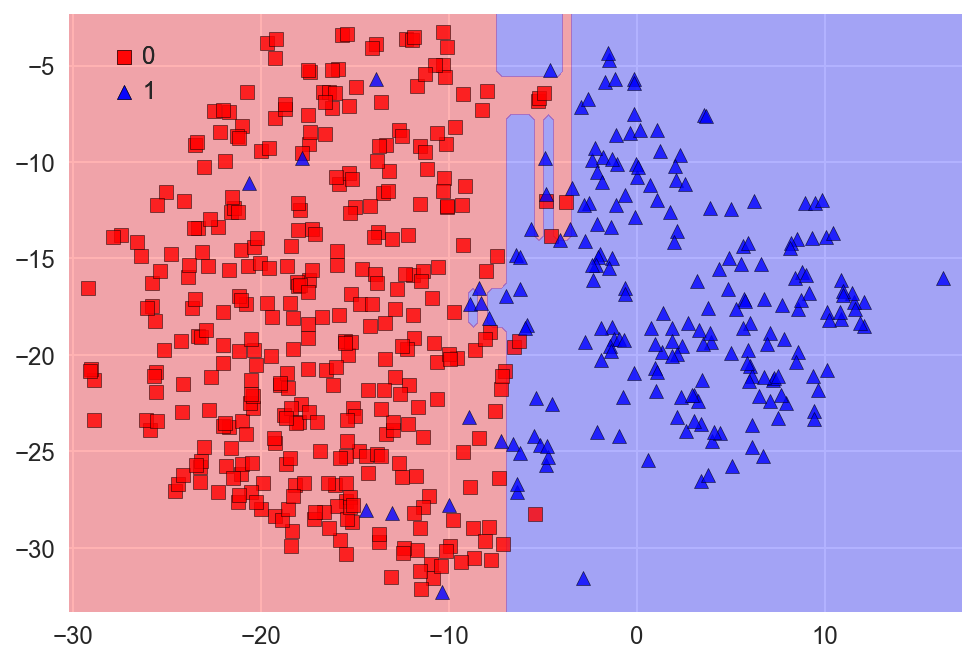

LinearSVC 0.944055944056


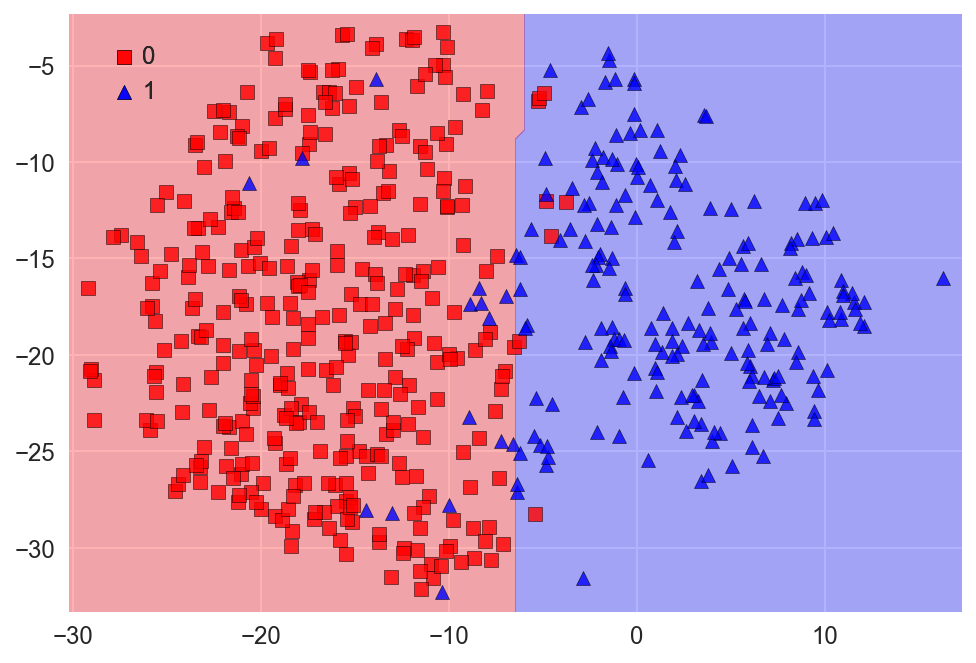

XGBClassifier 0.944055944056


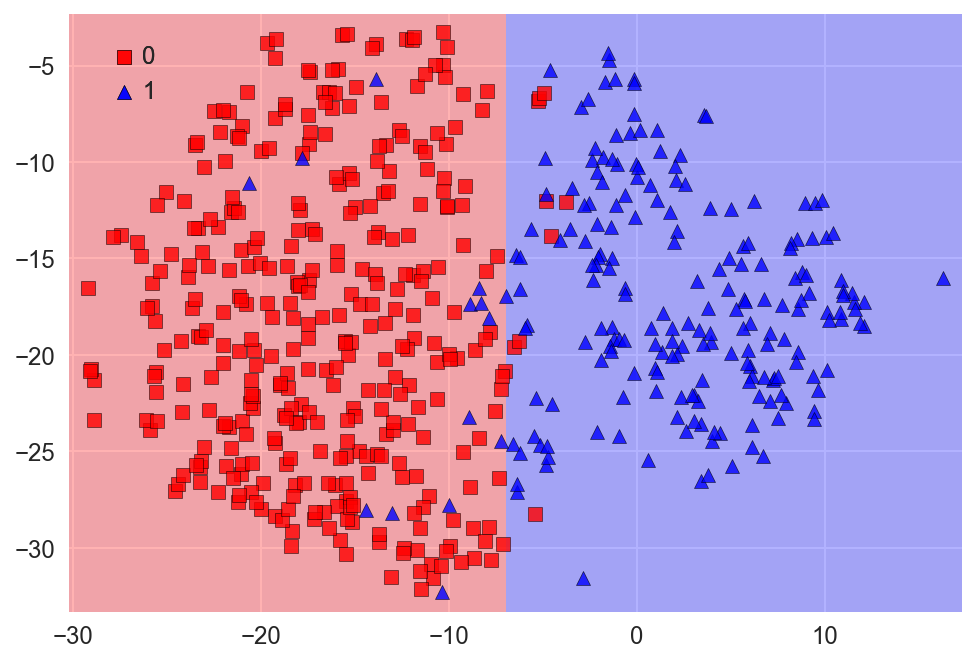

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mlxtend.plotting import plot_decision_regions

X = df.drop(['diagnosis_new', 'diagnosis'], axis=1).values
y = df['diagnosis_new'].values
X = RobustScaler().fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, init='pca', n_iter=2000)
X2 = tsne.fit_transform(X)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=1)

for clf in classifiers:
    clf.fit(X2_train, y2_train)
    print(type(clf).__name__, clf.score(X2_test, y2_test))
    plot_decision_regions(X=X2, y=y, clf=clf, legend=2, res=0.5)
    plt.show()